In [33]:
import nesdis_aws

# download

In [34]:
query = nesdis_aws.AwsQuery(path2folder_local='/export/htelg/tmp/',
                            satellite='16',
                            product='ABI-L2-LST',
                            scan_sector='C',
                            start='2017-08-01 12:00:00',
                            end='2017-08-01 13:00:00',
                           )

In [35]:
print(query.info_on_current_query())


no of files: 1
estimated disk usage: 2 mb
remaining disk space after download: 53 %



In [ ]:
#query.workplan[::10]
#resampled = query.workplan.resample('15min').first()
#resampled
#query.workplan = resampled

In [36]:
query.download()

[None]

In [38]:
query.workplan

path2file_aws  \
2017-08-01 12:02:18  noaa-goes16/ABI-L2-LSTC/2017/213/12/OR_ABI-L2-...   

                                                       path2file_local  
2017-08-01 12:02:18  /export/htelg/tmp/OR_ABI-L2-LSTC-M3_G16_s20172...

In [39]:
query.workplan.path2file_local

2017-08-01 12:02:18    /export/htelg/tmp/OR_ABI-L2-LSTC-M3_G16_s20172...
Name: path2file_local, dtype: object

## Open and plot

In [140]:
# p2f = pl.Path('/export/htelg/tmp/OR_ABI-L2-LSTC-M6_G16_s20221931201172_e20221931203545_c20221931205199.nc')
p2f = query.workplan.path2file_local.iloc[0]

In [141]:
si = ngs.open_file(p2f)

bubasd


In [142]:
si.ds

<xarray.Dataset>
Dimensions:                                 (y: 1500, x: 2500,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             number_of_LZA_bounds: 2,
                                             number_of_SZA_bounds: 2)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float64 0.1265 ... 0.04259
  * x                                       (x) float64 -0.07501 ... 0.06493
    y_image                                 float32 ...
    x_image                                 float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    solar_zenith_angle                      float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds
Data variables: (12/25)
    LST                                     (y, x) float32 ...
    DQF                                     (y, x) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 ...
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    standard_deviation_lst                  float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v25, 05 July 2013)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2017-08-01T12:02:18.2Z
    time_coverage_end:         2017-08-01T12:04:55.5Z
    timeline_id:               ABI Mode 3
    production_data_source:    Realtime
    id:                        d597e5ec-7540-47ae-8405-b06303f777b1

/export/htelg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:1138: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = bmap.pcolormesh(lons, lats, ds[variable], latlon=True, **pcolor_kwargs)


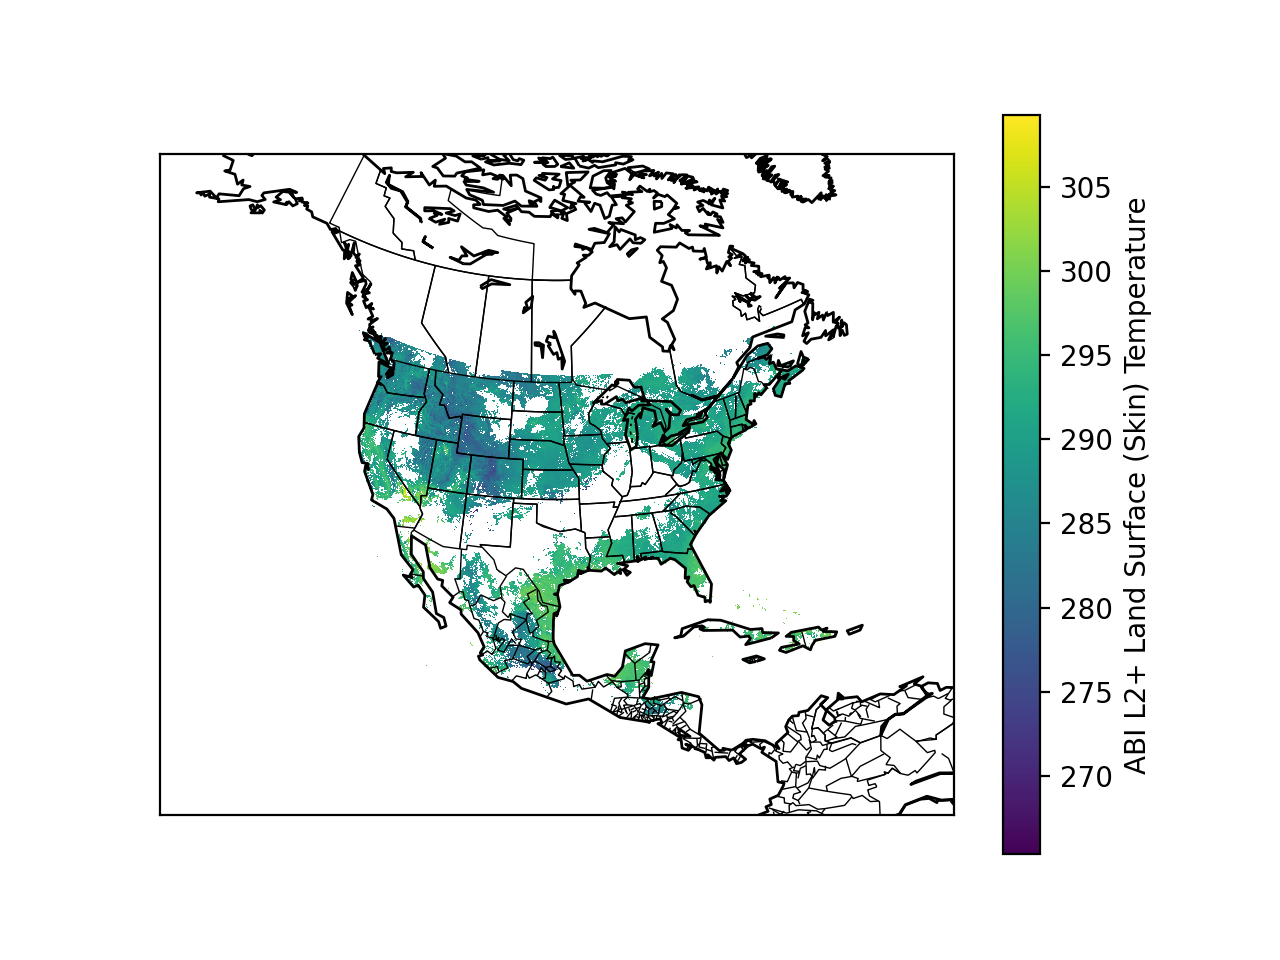

In [145]:
%matplotlib widget
bmap, pc, cb = si.plot('LST')

# Some development

In [2]:
import nesdis_gml_synergy.satlab as ngs

In [49]:
p2f.name

'OR_ABI-L2-LSTC-M3_G16_s20172131202182_e20172131204555_c20172131206115.nc'

In [134]:
reload(ngs)

<module 'nesdis_gml_synergy.satlab' from '/export/htelg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py'>

In [135]:
# p2f = pl.Path('/export/htelg/tmp/OR_ABI-L2-LSTC-M6_G16_s20221931201172_e20221931203545_c20221931205199.nc')
p2f = query.workplan.path2file_local.iloc[0]
si = ngs.open_file(p2f)

bubasd


In [139]:
si.ds

<xarray.Dataset>
Dimensions:                                 (y: 1500, x: 2500,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             number_of_LZA_bounds: 2,
                                             number_of_SZA_bounds: 2)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float64 0.1265 ... 0.04259
  * x                                       (x) float64 -0.07501 ... 0.06493
    y_image                                 float32 ...
    x_image                                 float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    solar_zenith_angle                      float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds
Data variables: (12/27)
    LST                                     (y, x) float32 ...
    DQF                                     (y, x) float32 2.0 2.0 ... 2.0 2.0
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 ...
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    lon                                     (y, x) float32 -140.6 ... -66.94
    lat                                     (y, x) float32 52.77 52.76 ... 14.19
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v25, 05 July 2013)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2017-08-01T12:02:18.2Z
    time_coverage_end:         2017-08-01T12:04:55.5Z
    timeline_id:               ABI Mode 3
    production_data_source:    Realtime
    id:                        d597e5ec-7540-47ae-8405-b06303f777b1

/export/htelg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:1138: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = bmap.pcolormesh(lons, lats, ds[variable], latlon=True, **pcolor_kwargs)


(<mpl_toolkits.basemap.Basemap at 0x7fecb46e8220>,
 <matplotlib.colorbar.Colorbar at 0x7fecb5805f90>)

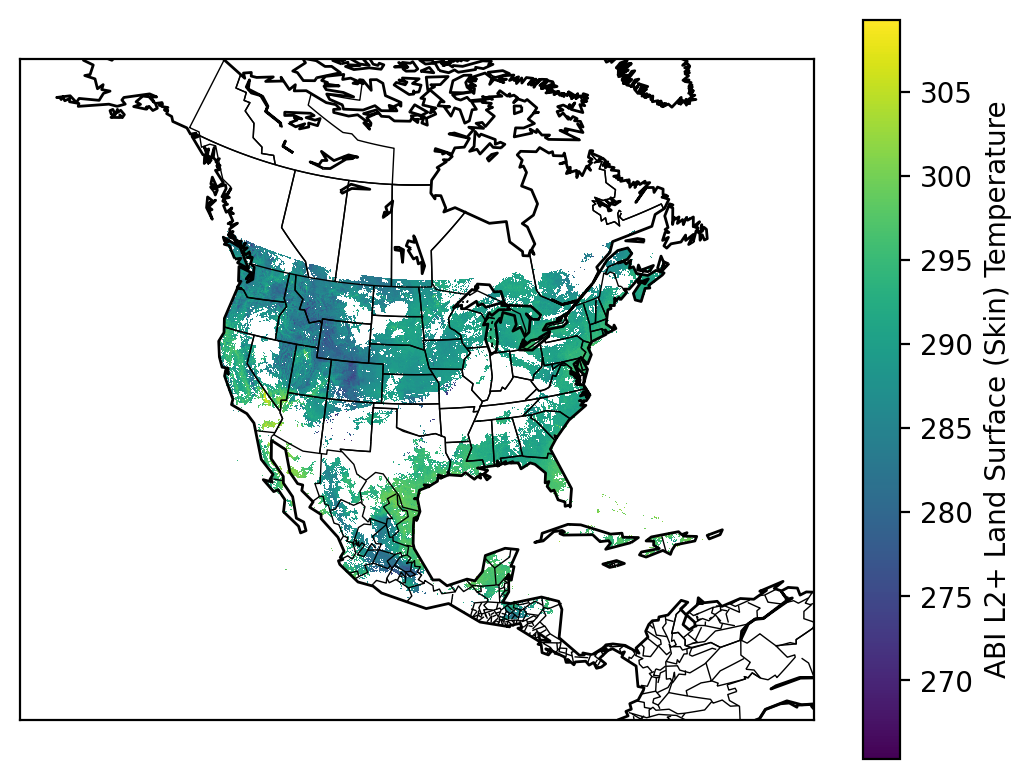

In [137]:
si.plot('LST', data_quality = [0])

/export/htelg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:1138: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = bmap.pcolormesh(lons, lats, ds[variable], latlon=True, **pcolor_kwargs)


(<mpl_toolkits.basemap.Basemap at 0x7fecb4718940>,
 <matplotlib.colorbar.Colorbar at 0x7fecb516bac0>)

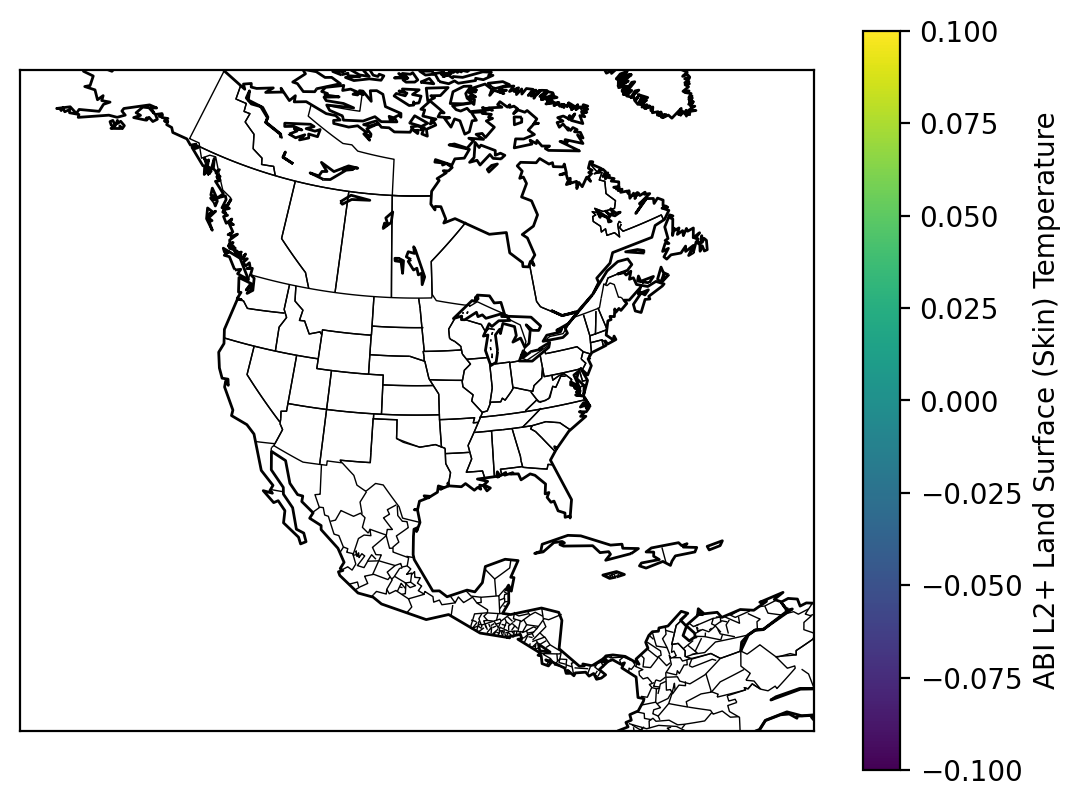

In [127]:
si.plot('LST', data_quality = [1])

/export/htelg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:1138: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = bmap.pcolormesh(lons, lats, ds[variable], latlon=True, **pcolor_kwargs)


(<mpl_toolkits.basemap.Basemap at 0x7fecb582de70>,
 <matplotlib.colorbar.Colorbar at 0x7fecb619a5f0>)

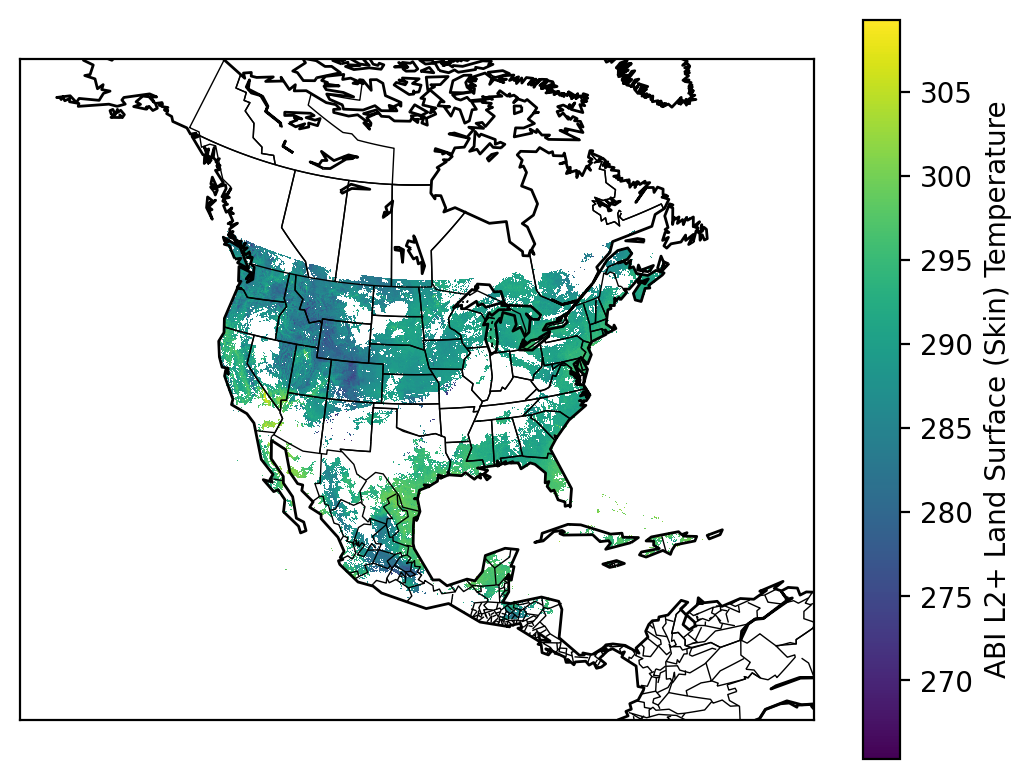

In [128]:
si.plot('LST', data_quality = [1,0])

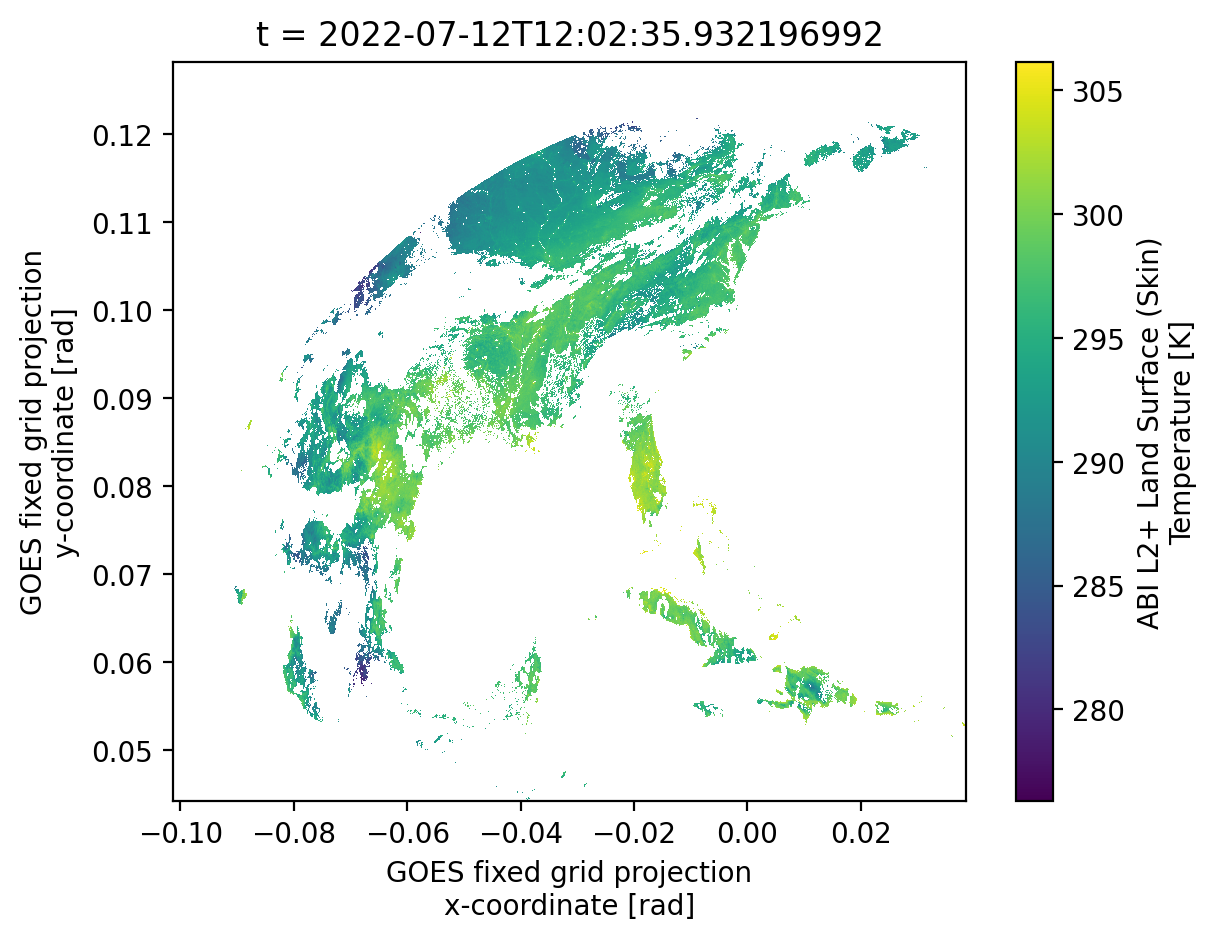

In [28]:
si.data_by_quality_high.LST.plot()

In [62]:
p2f.name#.split('_')

'OR_ABI-L2-LSTC-M3_G16_s20172131202182_e20172131204555_c20172131206115.nc'

In [63]:
product_name = si.ds.attrs['dataset_name'].split('_')[1]

In [68]:
tl = ['sensor', 'level', 'name', 'version']
product_info = {tl[e]:p for e,p in enumerate(product_name.split('-'))}

{'sensor': 'ABI', 'level': 'L2', 'name': 'LSTC', 'version': 'M3'}

In [50]:
'PQI' in si.ds.variables

False

In [30]:
si.data_by_quality_high

<xarray.Dataset>
Dimensions:  (y: 1500, x: 2500)
Coordinates:
    t        datetime64[ns] 2022-07-12T12:02:35.932196992
  * y        (y) float64 0.1282 0.1282 0.1281 0.128 ... 0.04438 0.04432 0.04427
  * x        (x) float64 -0.1013 -0.1013 -0.1012 ... 0.0385 0.03856 0.03861
Data variables:
    LST      (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    PQI      (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan

/export/htelg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:1108: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = bmap.pcolormesh(lons, lats, ds[variable], latlon=True, **pcolor_kwargs)


(<mpl_toolkits.basemap.Basemap at 0x7fecd23b5540>,
 <matplotlib.colorbar.Colorbar at 0x7fecd1f0e350>)

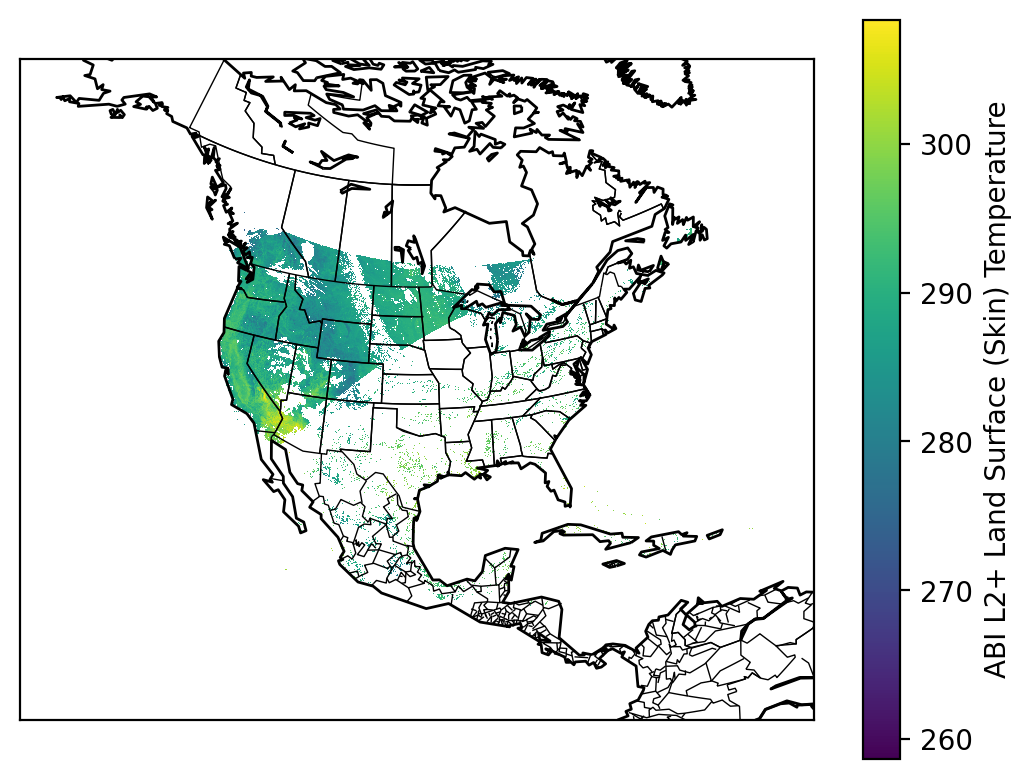

In [23]:
si.plot('LST', qf=1) #medium_quality_retrieval_qf

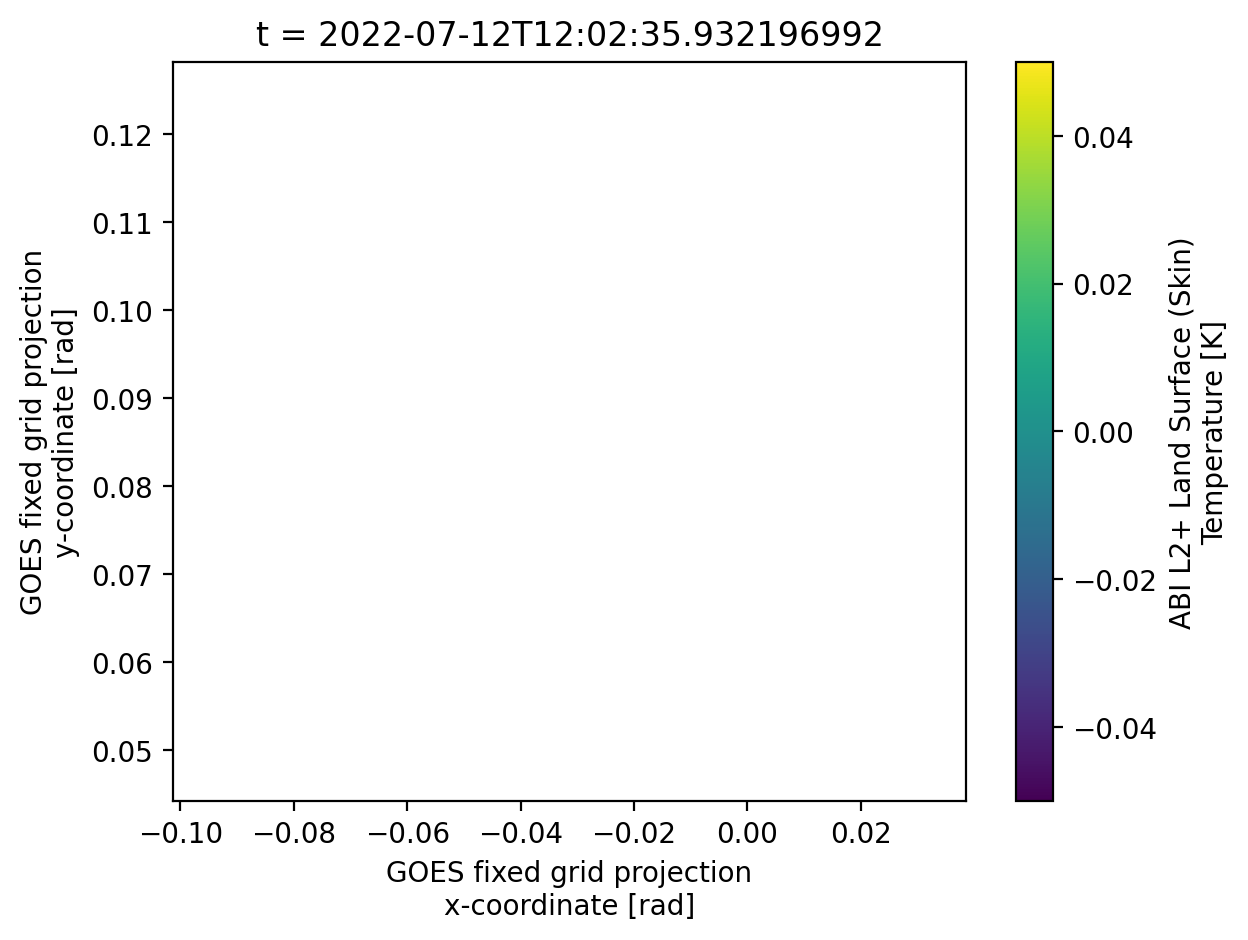

In [31]:
si.data_by_quality_medium.LST.plot()

/export/htelg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:1108: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = bmap.pcolormesh(lons, lats, ds[variable], latlon=True, **pcolor_kwargs)


(<mpl_toolkits.basemap.Basemap at 0x7fece10fa200>,
 <matplotlib.colorbar.Colorbar at 0x7fecd1cd7df0>)

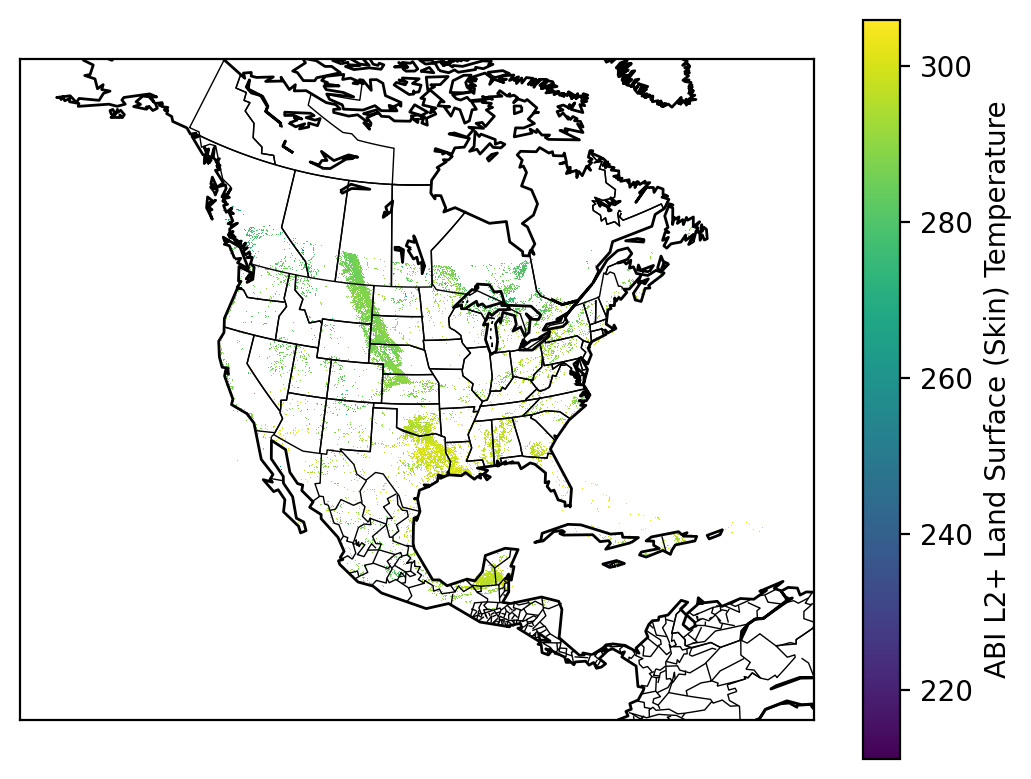

In [24]:
si.plot('LST', qf=2) #low_quality_retrieval_qf

/export/htelg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:1108: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = bmap.pcolormesh(lons, lats, ds[variable], latlon=True, **pcolor_kwargs)


(<mpl_toolkits.basemap.Basemap at 0x7fecd1b43430>,
 <matplotlib.colorbar.Colorbar at 0x7fecd18e3040>)

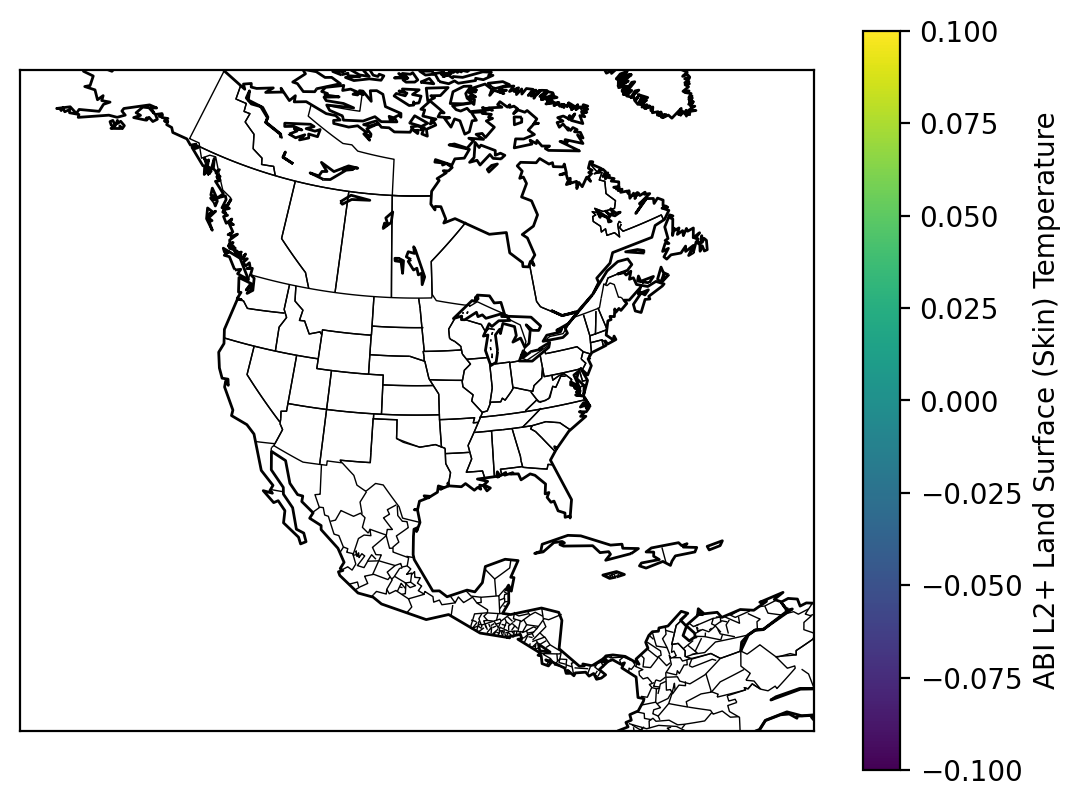

In [25]:
si.plot('LST', qf=3) #no_retrieval_qf

/export/htelg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:1108: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  


AttributeError: QuadMesh.set() got an unexpected keyword argument 'valid_qf'

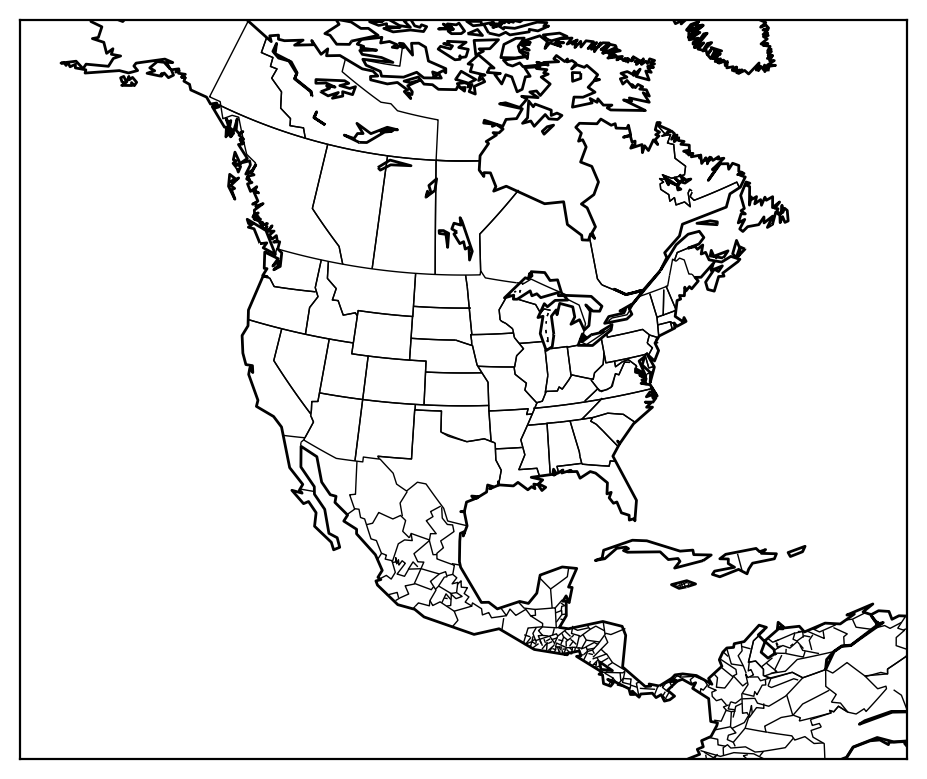

In [22]:
si.plot('DQF', valid_qf=False)

/export/htelg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:1103: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = bmap.pcolormesh(lons, lats, ds[variable], latlon=True, **pcolor_kwargs)


(<mpl_toolkits.basemap.Basemap at 0x7fece41dc610>,
 <matplotlib.colorbar.Colorbar at 0x7fece2272aa0>)

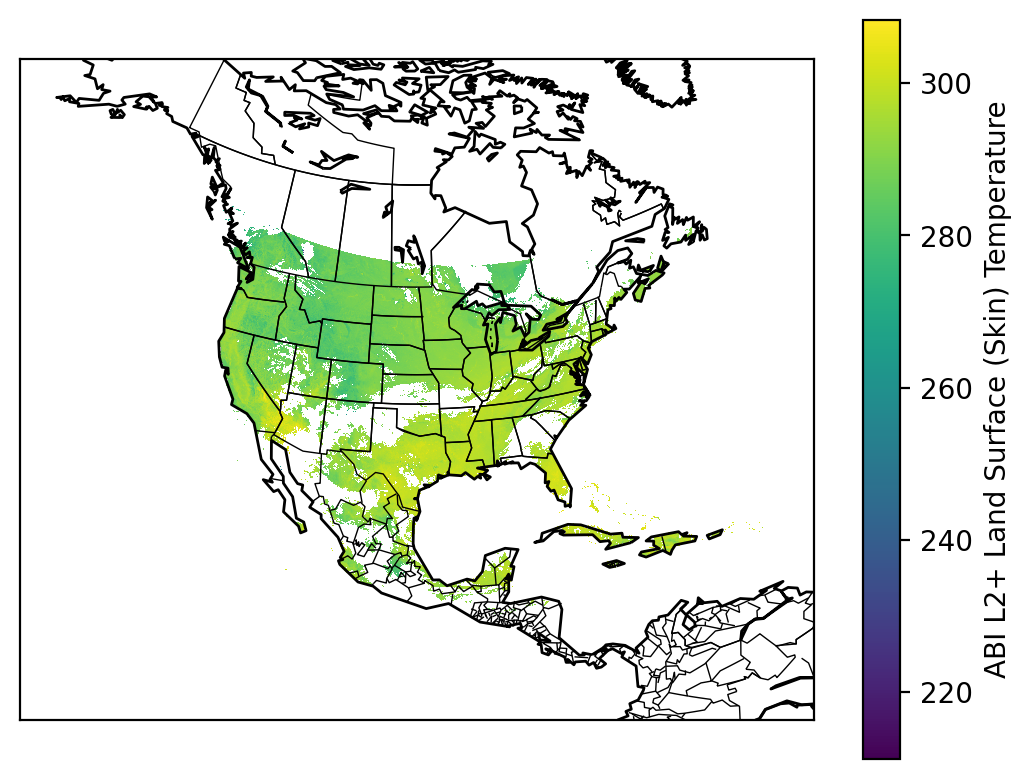

In [6]:
si.plot('LST', valid_qf=False)